# L1 - Linear models and gradient descent

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import numpy.linalg as LA
import pylab
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import time

## 2. Linear regression

Ex. 1

Сгенерируем данные и построим линейную регрессию

In [3]:
data_size = 20
eps = np.random.normal(0, 0.1, data_size)
x, y, A = [], [], []
for i in range(data_size):
    x.append(random.uniform(0, 2 * math.pi))
    y.append(math.sin(x[i]) + eps[i])
    A.append([x[i], 1.0])
coef1 = LA.pinv(A) #псевдообратная для матрицы А
coef1 = coef1.dot(y) #умножим на столбец значений b

Ex. 2

Построим график

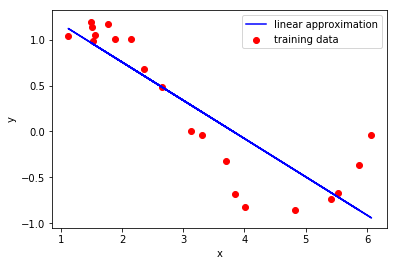

In [4]:
y1 = [coef1[0] * x[i] + coef1[1] for i in range(data_size)]
plt.scatter(x, y, color='r', label = 'training data')
plt.plot(x, y1,color='b', label = 'linear approximation') # График линии регрессии
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ex. 3-4

Теперь приблизим многочленами второй и третьей степени и посмотрим, что получится.

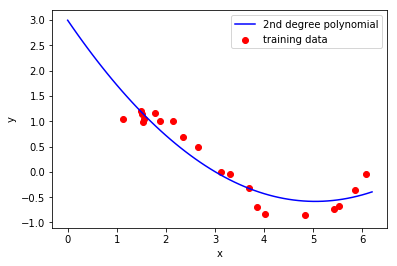

In [5]:
#by a polynomial of degree 2
B = np.matrix([[x[i] ** 2, x[i], 1.0] for i in range(data_size)])
 #псевдообратная для матрицы А
coef2 = LA.pinv(B).dot(y)
x2 = np.arange(0.0, 2 * np.pi, 0.1)
y2 = np.matrix([[a ** 2, a, 1.0] for a in x2]).dot(coef2.T)
plt.plot(x2, y2,color='b', label = '2nd degree polynomial') # График линии регрессии
plt.scatter(x, y, color='r', label = 'training data')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

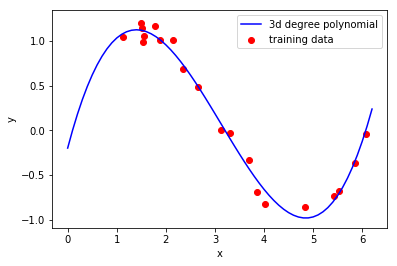

In [6]:
#by a polynomial of degree 3
C = np.matrix([[x[i] ** 3, x[i] ** 2, x[i], 1.0] for i in range(data_size)])
coef3 = LA.pinv(C).dot(y)
x3 = np.arange(0.0, 2 * np.pi, 0.1)
y3 = np.matrix([[a ** 3, a ** 2, a, 1.0] for a in x3]).dot(coef3.T)
plt.plot(x3, y3, color='b', drawstyle = 'default', label = '3d degree polynomial')
plt.scatter(x, y, color='r', label = 'training data')
plt.legend(loc=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Ex. 5

Увеличение степени многочлена, конечно же, ведёт к большей точности. Но, как можно заметить, даже многочлена третьей степени уже хватает для вполне хорошего приближения. А если возьмём многочлен степени 19, то он пройдёт через все точки выбоки (и будет явное переобучение).

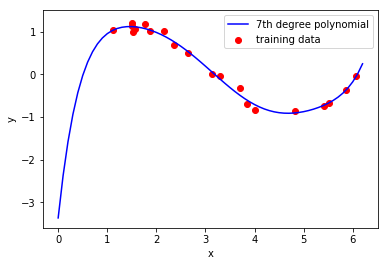

In [7]:
def polynom7(x):
    return [x ** 7, x ** 6, x ** 5, x ** 4, x ** 3, x ** 2, x, 1.0]
D = np.matrix([polynom7(x[i]) for i in range(data_size)])
coef4 = LA.pinv(D).dot(y)
x4 = np.arange(0.0, 2 * np.pi, 0.1)
y4 = np.matrix([polynom7(a) for a in x4]).dot(coef4.T)
plt.plot(x4, y4, color='b', drawstyle = 'default', label = '7th degree polynomial')
plt.scatter(x, y, color='r', label = 'training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

## 3. Validation
Ex. 1-3

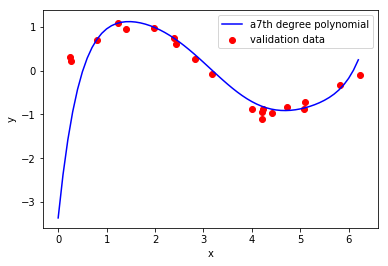

In [8]:
eps_valid = np.random.normal(0, 0.1, data_size)
x_valid, y_valid= [], []
for i in range(data_size):
    x_valid.append(random.uniform(0, 2 * math.pi))
    y_valid.append(math.sin(x_valid[i]) + eps_valid[i])
plt.plot(x4, y4, color='b', drawstyle = 'default', label = 'a7th degree polynomial')
plt.scatter(x_valid, y_valid, color='r', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

In [9]:
err_train = np.matrix([polynom7(a) for a in x]).dot(coef4.T) - np.matrix(y).T
print("Функция ошибок на обучающих данных составляет", float(err_train.T.dot(err_train)))
err_valid = np.matrix([polynom7(a) for a in x_valid]).dot(coef4.T) - np.matrix(y_valid).T
print("В то время как на новых данных она равна ", float(err_valid.T.dot(err_valid)))
print("Как видно, наболюдается переобучение")

Функция ошибок на обучающих данных составляет 0.11507939407114695
В то время как на новых данных она равна  4.731300564545496
Как видно, наболюдается переобучение


## 4. Binary linear classification

Ex. 1

Итак, $\mathbb{P}(y = 1 \mid x) = \frac{1}{1 + \exp{(-w^{T}x)}} = \sigma(w^{T}x)$. Тогда $\mathbb{P}(y = -1 \mid x) = 1 - \sigma(w^{T}x) = 1 - \frac{1}{1 + \exp{(-w^{T}x)}} = \frac{\exp{(-w^{T}x)}}{1 + \exp{(-w^{T}x)}} = \frac{1}{1 + \exp{(w^{T}x)}} = \sigma(-w^{T}x)$. А значит, $$\mathbb{P}(y = y_i \mid x) = \sigma(y_iw^{T}x).$$
Мы хотим максимизировать вероятность правильного предсказания по всей выборке, то есть $$\mathbb{P}(\underset{i}{\cap}(y = y_i \mid x_i))$$
Считая эти события независимыми, получим: 
$$\prod_{i}{\sigma(y_iw^{T}x_i)}$$
Прологорифмируем выражение, чтобы произведение перешло в сумму:
$$\ln{\prod_{i}{\sigma(y_iw^{T}x_i)}} = \sum_{i} \ln{\sigma(y_iw^{T}x_i)} = \sum_{i} \ln{\frac{1}{1 + \exp{(-y_i w^{T} x_i)}}} = -\sum_{i} \ln\left({1 + \exp{(-y_i w^{T} x_i)}}\right)$$
Таким образом, задача сводится к минимизации функции $Q(w^{T}) = \sum_{x, y} \ln\left({1 + \exp{(-y w^{T} x)}}\right)$ по аргументу $w^{T}$.

Ex. 2

Построим графики некоторых известных функций потерь: 
- Mean squared error
- Hinge loss
- Logistic loss
- Indicator loss


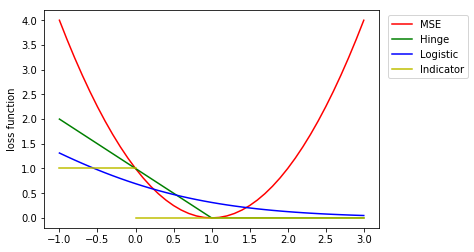

In [10]:
wx_av = np.arange(-1.0, 3.1, 0.1)
loss_MSE, loss_hinge, loss_logistic = [], [], []
for wx in wx_av:
    loss_MSE.append((wx - 1) ** 2)
    loss_hinge.append(max(0, 1-wx))
    loss_logistic.append(math.log(1 + math.exp(-wx)))
plt.plot(wx_av, loss_MSE, color='r', label = 'MSE')
plt.plot(wx_av, loss_hinge, color='g', label = 'Hinge')
plt.plot(wx_av, loss_logistic, color='b', label = 'Logistic')
plt.plot([-1, 0], [1, 1], color='y', label = 'Indicator') 
plt.plot([0, 3], [0, 0], color='y') 
plt.ylabel('loss function')
plt.legend(bbox_to_anchor=(1.28, 1),loc=1)
plt.show()

Ex. 3 - 4 $$ $$
Сгенерируем два множества нормально распределённых точек. Пусть первое множество $\sim \mathcal{N}(-2, 0.8)$, а второе $\sim \mathcal{N}(1, 0.9)$. Получим два "кластера".

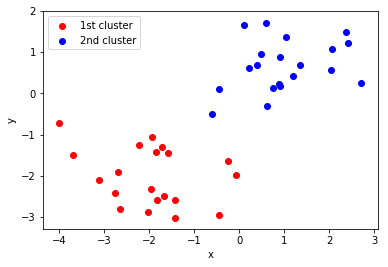

In [11]:
points1 = [np.random.normal(-2, 0.8, data_size), np.random.normal(-2, 0.8, data_size),
           1.0 * np.ones(data_size), np.ones(data_size)]
points2 = [np.random.normal(1, 0.9, data_size), np.random.normal(1, 0.9, data_size),
           1.0 * np.ones(data_size), -1 * np.ones(data_size)]
plt.scatter(points1[0], points1[1], color = 'r', label = '1st cluster')
plt.scatter(points2[0], points2[1], color = 'b', label = '2nd cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

Ex. 5-6

Разделим их прямой (по МНК).

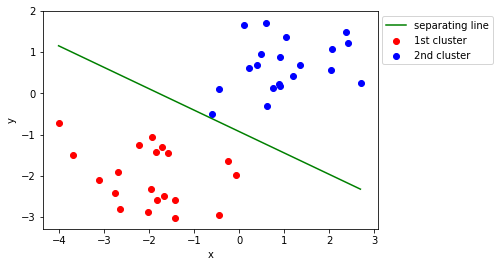

In [12]:
def line_cof(c):
    a = float(-c[0] / c[1])
    b = float( - c[2] / c[1] )
    return a, b
M = np.matrix(np.hstack((points1, points2)))
c = LA.pinv(M[:3].T).dot(M[3].T)
min_x, max_x = min(M[0].T), max(M[0].T)
x_av = np.arange(min_x, max_x, 0.1)
plt.scatter(points1[0], points1[1], color = 'r', label = '1st cluster')
plt.scatter(points2[0], points2[1], color = 'b', label = '2nd cluster')
a , b = line_cof(c)
plt.plot(x_av, [ a * x + b for x in x_av], color = 'g', label = 'separating line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.36, 1),loc=1)
plt.show()

Ex. 7

Пусть n -- число элементов в выборке, k -- число признаков, N = n $\cdot$ k.
Вычисление псевдообратной матрицы довольно затратно:

2 умножения и нахождение обратной по $\Theta\left(N^3\right)$, умножение матрицы на вектор значений --  $\Theta\left(N^2\right)$. $\textit{(Cтрого говоря, Python делает это быстрее.У него есть хорошие алгоритмы для распараллеливания.}$ $\textit{ Так что, представляем всё в матричном виде ещё и поэтому)}.$

Итак, сложность алгоритма: $O(N^3)$.

## 5. Gradient descent


Ex.1

Возьмём функцию $$z = (1 + x - y)^2 + (3x + 2y - 7)^2 + 5$$
Очевидно, она достигает своего минимума в точке $(1, 2)$, $z_{min} = 5$. $$ $$
Ex. 2-4 

Теперь попробуем найти минимум при помощи градиентного спуска:

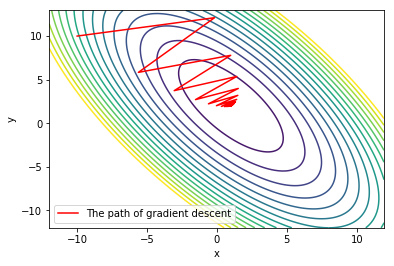

Минимум достигается в точке с координатами (0.989135, 1.993649) и равен 5.002072.
Алгоритм (с заданной точностью) выполняется за 33 шага


In [13]:
def func(x):
    return (1 + x[0] - x[1]) ** 2 + (3 * x[0] + 2 * x[1] - 7) ** 2 + 5
def grad(x):
    return np.array([2 * x[0] + x[1] - 4, x[0] + x[1] - 3])
def learning_rate(lmbd, x):
    return lmbd;
def makeData(start, end, step):   #Штука, которая генерирует данные для линий уровня
    X = np.arange(start[0], end[0], step)
    Y = np.arange(start[1], end[1], step)
    xgrid, ygrid = np.meshgrid(X, Y)
    zgrid = func([xgrid, ygrid])
    return xgrid, ygrid, zgrid
def gradient_descent(start, max_steps, lmbd, eps): # Возвращает точку минимума, кол-во шагов и траекторию
    path = [[], []] 
    min_x = start
    steps_count = 0
    for i in range(max_steps):
        d_x = grad(min_x)
        if start.size == 2:
            [path[i].append(min_x[i]) for i in range(start.size)]
        f_old = func(min_x)
        min_x -= learning_rate(lmbd, min_x) * d_x
        f_new = func(min_x)
        if abs(f_old - f_new) < eps:
            return min_x, steps_count, path
        steps_count += 1
    return min_x, steps_count, path
start1 = np.array([-10.0, 10.0])  #  Точка, из которой начинаем движение
steps1 = 1005 # Максимальное число шогов
lambda1, eps1 = 0.702, 0.001  #  Можно менять точность
min_x1, steps_count1, path1 = gradient_descent(start1, steps1, lambda1, eps1)
plt.plot()
plt.plot(path1[0], path1[1], color = 'r', label = 'The path of gradient descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=3)
X, Y, Z = makeData([-12, -12], [12, 13], 0.05)
levels = np.arange(5,func([8, 8]),70)
pylab.contour(X, Y, Z, levels = levels)
pylab.show()
plt.show()
print('Минимум достигается в точке с координатами (%f, %f) и равен %f.' %(min_x1[0], min_x1[1], func(min_x1)))
print('Алгоритм (с заданной точностью) выполняется за %d шага' %steps_count1)

Ex. 5 $$ $$
$\lambda$ выбиралось вручную: начала с 0.1 и увеличивала до тех пор, пока алгоритм не начал расходиться. $$ $$
Ex. 6 $$ $$
Не совсем понятно как говорить о сложности решения, но при отдалении от минимума количество шагов меняется мендленно. Так что, я бы сказала, что сложность практически константая.

#### Rosenbrock function
Ex. 1

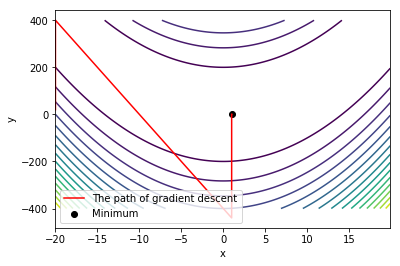

Минимум достигается в точке с координатами(1.000000, 1.000000) и равен 0.000000.
Алгоритм (с заданной точностью) выполняется за 4 шагов




In [14]:
def func(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2
def grad(x):
    return np.array([2 * (x[0] - 1) + 400 * x[0] * (x[0] ** 2 - x[1]), 200 * (x[1] - x[0] ** 2)])
def learning_rate(lmbd, x):
    return 0.001 / max(abs(grad(x)))
def gesse(x):
    g_xx = 1200 * x[0] ** 2 - 400 * x[1] + 2
    g_xy = -400 * x[0]
    g_yy = 200
    return np.array([[g_xx, g_xy], [g_xy, g_yy]])
def learning_rate(lmbd, x):
    return LA.inv(gesse(x))
def gradient_descent_rosenbr(start, max_steps, lmbd, eps): # Возвращает точку минимума, кол-во шагов и траекторию
    path = [[], []] 
    min_x = start
    steps_count = 0
    for i in range(max_steps):
        d_x = grad(min_x)
        if start.size == 2:
            [path[i].append(min_x[i]) for i in range(start.size)]
        f_old = func(min_x)
        min_x -= d_x @ learning_rate(lmbd, min_x) 
        f_new = func(min_x)
        if abs(f_old - f_new) < eps:
            return min_x, steps_count, path
        steps_count += 1
    return min_x, steps_count, path
start2 = np.array([-20.0, 20.0]) #  Можно поменять начальное расположение
steps2, steps_count2 = 1000005, 0
lambda2, eps2 = 0.00101, 0.00000001  #  Можно менять точность
X, Y, Z = makeData([-20, -400], [20, 400], 0.1)
min_x2, steps_count2, path2 = gradient_descent_rosenbr(start2, steps2, lambda2, eps2)
plt.plot()
plt.scatter(min_x2[0], min_x2[1], color = 'black',label = 'Minimum' )
plt.plot(path2[0], path2[1], color = 'r', label = 'The path of gradient descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=3)
levels = [0, func([-1, -1]), func([-2, -2])]
pylab.contour(X, Y, Z, 20)
pylab.show()
plt.show()
print('Минимум достигается в точке с координатами(%f, %f) и равен %f.' %(min_x2[0], min_x2[1], func(min_x2)))
print('Алгоритм (с заданной точностью) выполняется за %d шагов\n\n' %steps_count2)

Ex. 2

Алгоритм расходится, если выбирать не слишком маленькое $\lambda$ равномерно или убывающей геометрической прогрессией. А если $\lambda$ слишком мало, алгоритм работает, но очень долго. Пришлось повозиться, чтобы подобрать функцию для (более-менее) хорошего $\lambda$, которое выбирается на каждом шаге как $\dfrac{0.01}{max(|f'_x(x_k)|, |f'_y(x_k)|)}$. 
Это связано с тем, что функция Розенброка имеет очень пологое дно. То есть при приближении к точке минимума значение меняется незначительно.


Ex. 3

Лучше всего на этой функции работает метод Ньютона. Это связано с квадратичным приближением функции.

Можно решать методом наискроейшего спуска :) Но, пологаю, он был пребережён для следующих упражнений.

### Steepest descent
Ex. 1-3

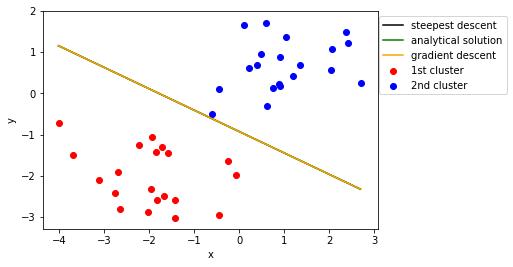

In [15]:
x, y = M[:3], M[3]
def func(w):
    return (w @ x - y) @ (w @ x - y).T

def grad(w):
    return 2 * (w @ x - y) @ x.T

def learning_rate(lmbd, w):
    div1 = (w @ x - y) @ (grad(w) @ x).T
    div2 = grad(w) @ x
    div2 = div2 @ div2.T
    return div1 / (2 * div2)
start2 = np.array([1.0, 2.0, 1.0]).reshape(1, 3) #  Можно поменять начальное расположение
steps2, steps_count2 = 1000005, 0
lambda2, eps2 = 0.001012, 0.00000001  #  Можно менять точность
w, steps_count2, path = gradient_descent(start2, steps2, lambda2, eps2)
min_x, max_x = min(M[0].T), max(M[0].T)
x_av = np.arange(min_x, max_x, 0.1)
plt.scatter(points1[0], points1[1], color = 'r', label = '1st cluster')
plt.scatter(points2[0], points2[1], color = 'b', label = '2nd cluster')
a , b = line_cof(w.T)
plt.plot(x_av, [ a * x + b for x in x_av], color = 'black', label = 'steepest descent')
a , b = line_cof(c)
plt.plot(x_av, [ a * x + b for x in x_av], color = 'green', label = 'analytical solution')
plt.xlabel('x')
plt.ylabel('y')
#Посчитаем минимум с помощью градиентного спуска с фиксированным лямбда
def learning_rate(lmbd, x):
    return 0.001013
w, steps_count4, path = gradient_descent(start2, 100, lambda2, eps2)
a , b = line_cof(w.T)
plt.plot(x_av, [ a * x + b for x in x_av], color = 'orange', label = 'gradient descent')
plt.legend(bbox_to_anchor=(1.4, 1),loc=1)
plt.show()

# 6. Stochastic gradient descent

Ex. 1-3

In [16]:
data = pd.read_csv('train.csv')
data = np.array(data)
print(data.shape)

(42000, 785)


In [17]:
digit= [[], []]
for row in data:
    if row[0] == 0:
        digit[0].append(row[1:])
    if row[0] == 1:
        digit[1].append(row[1:])
digit = np.array([np.array(d) for d in digit])
x = np.vstack((digit[0], digit[1]))
y = np.hstack((1.0 * np.ones(digit[0].shape[0]), -1 * np.ones(digit[1].shape[0]))).reshape(8816, 1)
x = np.hstack((x, (np.ones(y.shape[0])).reshape(8816, 1)))
data_size = y.shape[0]
def func(w):
    summ = 0
    for i in range(data_size):
        deg = y[i] * w @ x[i]
        if (deg > -20):
            summ += math.log(1 + math.exp(-deg))
    return summ

def grad(w, it):
    d_w = np.zeros(785).reshape(785, 1)
    for i in it:
        deg = y[i] * w @ x[i]
        if deg <  40:
            d_w += (y[i] * x[i] / (1 + math.exp(deg))).reshape(785, 1)
        if deg < -40 :
            d_w += (y[i] * x[i]).reshape(785, 1)
    return -d_w

def stochastic_descent(start, epochs, lmbd, eps, bathch_size):
    min_x = start
    steps_count = 0
    for i in range(epochs):
        bathch_iter = np.array([random.randint(0, 8815) for i in range(bathch_size)])
        d_x = grad(min_x, bathch_iter)
        f_old = func(min_x)
        min_x -= lmbd * d_x.T
        f_new = func(min_x)
        if abs(f_old - f_new) < eps:
            return min_x, steps_count
        steps_count += 1
    return min_x, steps_count
start3 = np.zeros((1, 785))
steps3, steps_count3 = 100, 0
lambda3, eps3 = 0.001, 0.000001 
w_best, steps_count2 = stochastic_descent(start3, steps3, lambda3, eps3, 40)

def accuracy(w):
    right = 0 
    y_pred = (w @ x.T).T
    for i in range(data_size):
        if y_pred[i] * y[i] > 0:
            right += 1
    return right / data_size
print('Точность предсказания составляет ', accuracy(w_best))

Точность предсказания составляет  0.9914927404718693


In [18]:
batches = []
accuracy_depend = []
time_depend = []
loss_depend = []
steps = []
w_begin = np.zeros((1, 785))
#w_new_best = stoh_gradient(w_begin, derivate, 100, 1, 0.01, train_set)
#print(accuracy(w_new_best, x_train, y_train))